Current price: $47.70
Expected price after 60 days: $58.12
Expected return: 21.85%
Probability of price increase: 77.50%


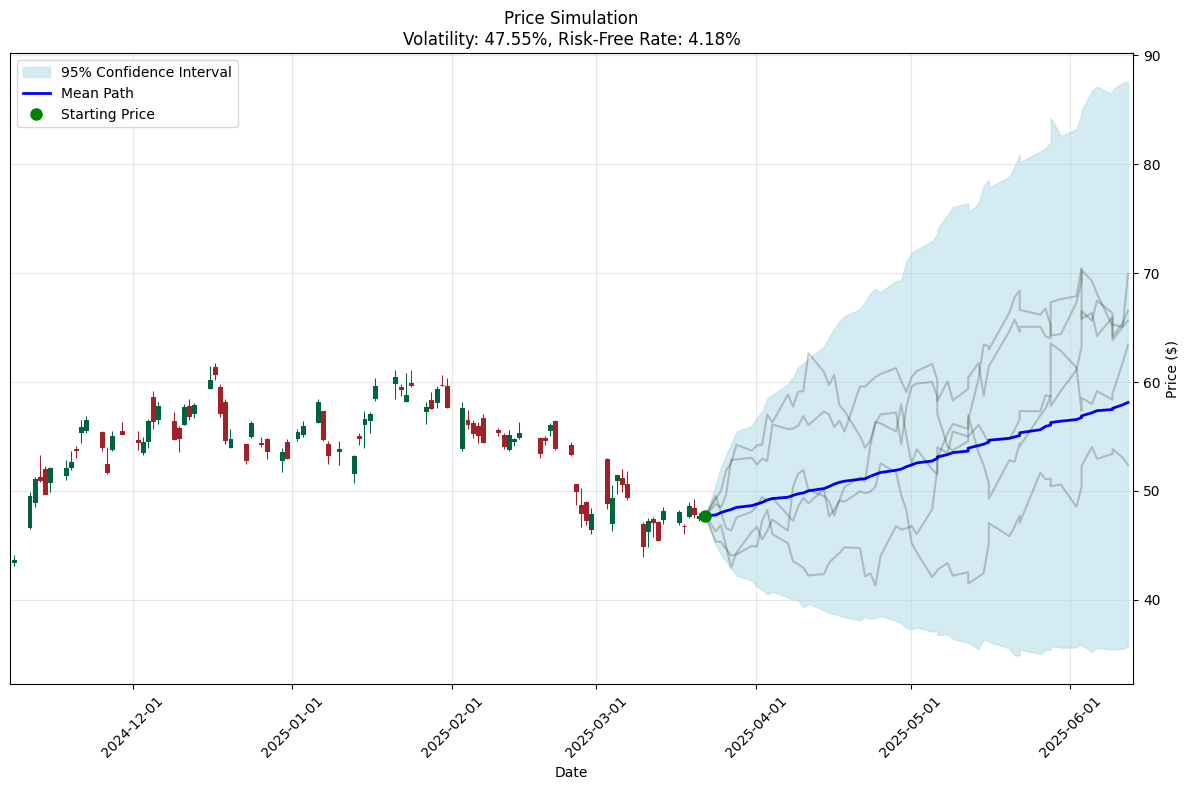

In [6]:
from financial_sim_library.stock_simulator.models.gbm import GBMModel
from financial_sim_library.visualization.price_plots import plot_price_simulations
from financial_sim_library.stock_simulator.models.growth_models import FixedGrowthModel
from financial_sim_library.utils.data_fetcher import fetch_historical_prices
import numpy as np

# Create a fixed growth model with 130% annual growth rate
fixed_growth = FixedGrowthModel(growth_rate=1.3)

# Create a GBM model for Apple stock with the fixed growth model
model = GBMModel(ticker="IBIT", growth_model=fixed_growth)

# Fetch historical data for the last 120 days
historical_data = fetch_historical_prices("IBIT", period="6mo", interval="1d")  # Fetch 6 months to ensure we get 120 trading days
if historical_data.empty:
    print("Warning: Could not fetch historical data. Plotting simulation only.")

days_to_simulate = 60

# Run a simulation
results = model.simulate(
    days_to_simulate=days_to_simulate,
    num_simulations=1000
)
# Print key statistics
stats = results['statistics']
print(f"Current price: ${results['current_price']:.2f}")
print(f"Expected price after {days_to_simulate} days: ${stats['mean']:.2f}")
print(f"Expected return: {stats['expected_return']:.2f}%")
print(f"Probability of price increase: {stats['prob_above_current']:.2f}%")

# Visualize the results with historical data
plot_price_simulations(
    results,
    historical_data=historical_data,
    days_to_show=90  # Show last 120 days of historical data
)